## Check selected labs usage across all sites

In [91]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [2]:
selected_labs_dict = {'Glucose [Mass/volume] in Serum or Plasma':'glucose_in_serum',
        'Creatinine [Mass/volume] in Serum or Plasma':'creatinine_in_serum',
        'Prothrombin time (PT)':'prothrombin_time',
        ' Eosinophils [#/volume] in Blood':'eosinophils',
        ' Lymphocytes [#/volume] in Blood':'lymphocytes',
        ' Basophils [#/volume] in Blood':'basophils',
        'Sodium [Moles/volume] in Serum or Plasma':'sodium_in_serum',
        'Potassium [Moles/volume] in Serum or Plasma':'potassium_in_serum',
        ' Hematocrit [Volume Fraction] of Blood':'hematocrit',
        ' Hemoglobin [Mass/volume] in Blood':'hemoglobin',
        'Erythrocytes [#/volume] in Blood by Automated count':'erithrocytes',
        ' Monocytes [#/volume] in Blood':'monocytes',
        ' Neutrophils [#/volume] in Blood':'neutrophils',
        'Platelets [#/volume] in Blood by Automated count':'platelets',
#         ' Urea nitrogen [Mass/volume] in Blood':'blood_urea_nitrogen',
#         ' Fibrinogen [Mass/volume] in Platelet poor plasma by Coagulation assay':'fibrinogen',
        'Bilirubin.total [Mass/volume] in Serum or Plasma':'bilirubin_in_serum',
        'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma':'alanine_aminotransferase',
        'Gamma glutamyl transferase [Enzymatic activity/volume] in Serum or Plasma':'gamma_glutamyl_transferase',
        'pH of Urine by Test strip':'ph_in_urine',
        'Albumin [Mass/volume] in Serum or Plasma':'albumin_in_serum',
        'Calcium [Mass/volume] in Serum or Plasma':'calcium_in_serum',
        ' pH of Venous blood':'ph_venous_blood',
        'Bicarbonate [Moles/volume] in Venous blood':'bicarbonate_venous_blood',
        ' Oxygen [Partial pressure] in Venous blood':'oxygen_venous_blood',
#         ' Carbon dioxide [Partial pressure] in Venous cord blood':'CO2_venous_blood',
        'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma':'aspartate_aminotransferase',
        ' Lactate dehydrogenase [Enzymatic activity/volume] in Serum or Plasma':'lactate_dehydrogenase',
        'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma':'alkaline_phosphatase',
        ' Urate [Mass/volume] in Serum or Plasma':'urate_in_serum',
        'Triglyceride [Mass/volume] in Serum or Plasma':'triglyceride_in_serum',
        'Cholesterol [Mass/volume] in Serum or Plasma': 'cholestrol_in_serum',
        'Reticulocytes [#/volume] in Blood':'reticulocytes_in_blood'}

selected_labs_keys = [i.lstrip().rstrip() for i in selected_labs_dict.keys()]
selected_labs_dict = dict(zip(selected_labs_keys, selected_labs_dict.values()))


## Get LOINC Codes of selected labs

In [15]:
SITE_NAMES = ['HUF', 'HIL', 'HHE']

per_site_lab_counts = []
for SITE_NAME in SITE_NAMES:
    print('Getting LOINC codes for selected labs at %s site'%SITE_NAME)
    lab_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LABS.txt')
    lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LOINC_LOOKUP.txt')

    # get the loinc lookup file to get description of the lab test
    df_loinc = pd.read_csv(lookup_csv_path, delimiter='|')
    
    df_loinc.drop_duplicates(subset=['LOINC'], keep='last', inplace=True)
    
    for lab_name, lab_aka in selected_labs_dict.items():
        
        # get inds of current lab 
        inds = df_loinc.DESCRIPTION.str.contains(lab_name, regex=False)
        
        # get the loinc code
        loincs = df_loinc[inds].LOINC.unique()
        
        print('lab_name : %s, LOINC Code(s) : \n'%lab_name)
        print(loincs)

Getting LOINC codes for selected labs at HUF site
lab_name : Glucose [Mass/volume] in Serum or Plasma, LOINC Code(s) : 

['2345-7']
lab_name : Creatinine [Mass/volume] in Serum or Plasma, LOINC Code(s) : 

['2160-0']
lab_name : Prothrombin time (PT), LOINC Code(s) : 

['5894-1' '5902-2']
lab_name : Eosinophils [#/volume] in Blood, LOINC Code(s) : 

['26449-9' '711-2']
lab_name : Lymphocytes [#/volume] in Blood, LOINC Code(s) : 

['26474-7' '731-0']
lab_name : Basophils [#/volume] in Blood, LOINC Code(s) : 

['26444-0' '704-7']
lab_name : Sodium [Moles/volume] in Serum or Plasma, LOINC Code(s) : 

['2951-2']
lab_name : Potassium [Moles/volume] in Serum or Plasma, LOINC Code(s) : 

['2823-3']
lab_name : Hematocrit [Volume Fraction] of Blood, LOINC Code(s) : 

['20570-8' '4544-3']
lab_name : Hemoglobin [Mass/volume] in Blood, LOINC Code(s) : 

['718-7']
lab_name : Erythrocytes [#/volume] in Blood by Automated count, LOINC Code(s) : 

['789-8']
lab_name : Monocytes [#/volume] in Blood, LOI

In [20]:
inds = df_loinc.DESCRIPTION.str.contains('Eosinophils [#/volume] in Blood', regex=False)
df_loinc[inds].DESCRIPTION.values

array([' Eosinophils [#/volume] in Blood',
       'Eosinophils [#/volume] in Blood by Automated count'], dtype=object)

## Get STCID codes for selected vitals

In [23]:
for SITE_NAME in SITE_NAMES[:1]:
    print('Getting STCID codes for selected vitals at %s site'%SITE_NAME)
    lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'STCID_LOOKUP.txt')
    
    # get the vitals lookup table for vitals descriptions
    df_stcid = pd.read_csv(lookup_csv_path, delimiter='|')

    # remove the duplicate entries in the VITALS lookup
    df_stcid.drop_duplicates(subset='STCID', keep='last', inplace=True)	

    # remove nan stcids
    nan_inds = pd.isna(df_stcid['STCID'])
    df_stcid = df_stcid.loc[~nan_inds,:]
    
    # convert dtype of stcid for merging
    df_stcid['STCID'] = df_stcid['STCID'].astype(int)

Getting STCID codes for selected vitals at HUF site


In [24]:
df_stcid

,STCID,VITAL_SIGN,DESCRIPTION,CODING_STANDARD
0,373453009,Administración de suplementos,Nutritional supplement (substance),SNOMED International v1.36.1
1,51717002,CO2 Espirado,Expired carbon dioxide concentration (observab...,SNOMED International v1.36.1
2,225908003,Dolor (0-10),Pain score (observable entity),SNOMED International v1.36.1
3,273904000,Dolor Escala Analógica 0-10,Visual analog pain scale,SNOMED International v1.36.1
4,425423002,EVA movimiento (0 nada - 10 máx),Pain provoked by movement (finding),SNOMED International v1.36.1
5,52598005,EVA reposo (0 nada - 10 máx),Rest pain (finding),SNOMED International v1.36.1
7,7121000122100,Escala Painad,Pain Assessment in Advanced Dementia Scale (as...,SNOMED International v1.36.1
8,398210001,Escala de bloqueo motor,Bromage scale (assessment scale),SNOMED International v1.36.1
9,281400004,Escala de sedación,Ramsay sedation scale (assessment scale),SNOMED International v1.36.1
10,162715009,Estado Mental,On examination - mental state (finding),SNOMED International v1.36.1


In [18]:
SITE_NAMES = ['HUF', 'HIL', 'HHE']

per_site_lab_counts = []
for SITE_NAME in SITE_NAMES:
    lab_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LABS.txt')
    lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LOINC_LOOKUP.txt')

    # get the lab information
    df_labs = pd.read_csv(lab_csv_path, delimiter='|', quotechar=None, quoting=3)

    # get the loinc lookup file to get description of the lab test
    df_loinc = pd.read_csv(lookup_csv_path, delimiter='|')

    # remove duplicate loincs
    df_loinc.drop_duplicates(subset=['LOINC'], keep='last', inplace=True)

    # merge with labs csv to get lab descriptions based on LOINC
    df_labs = pd.merge(df_labs, df_loinc, on='LOINC', how='inner')

    df_labs.rename(columns = {'VALUE_x':'LAB_TEST_VALUE', 'DESCRIPTION':'LAB_TEST_NAME'}, inplace=True)

    # get counts of patients administered a lab
    lab_patient_counts_dict = dict.fromkeys( selected_labs_dict.values())
    for lab_name, lab_col_name in selected_labs_dict.items():
        lab_inds = df_labs.LAB_TEST_NAME.str.contains(lab_name, regex=False)
        df_lab = df_labs[lab_inds].rename(columns = {'LAB_TEST_VALUE':lab_col_name}).drop(labels=['LAB_TEST_NAME','UNIT'], axis=1)
        lab_patient_counts = len(df_lab.PATIENT_ID.unique())
        print('Lab %s conducted on %d patients at Site %s'%(lab_name, lab_patient_counts, SITE_NAME))
        lab_patient_counts_dict[lab_col_name] = lab_patient_counts
    per_site_lab_counts.append(lab_patient_counts_dict)
    
    del df_labs

Lab Glucose [Mass/volume] in Serum or Plasma conducted on 42654 patients at Site HUF
Lab Creatinine [Mass/volume] in Serum or Plasma conducted on 45401 patients at Site HUF
Lab Prothrombin time (PT) conducted on 37178 patients at Site HUF
Lab Eosinophils [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Lymphocytes [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Basophils [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Sodium [Moles/volume] in Serum or Plasma conducted on 44864 patients at Site HUF
Lab Potassium [Moles/volume] in Serum or Plasma conducted on 44844 patients at Site HUF
Lab Hematocrit [Volume Fraction] of Blood conducted on 48951 patients at Site HUF
Lab Hemoglobin [Mass/volume] in Blood conducted on 37515 patients at Site HUF
Lab Erythrocytes [#/volume] in Blood by Automated count conducted on 48951 patients at Site HUF
Lab Monocytes [#/volume] in Blood conducted on 48951 patients at Site HUF
Lab Neutrophils [#/volume] in Bl

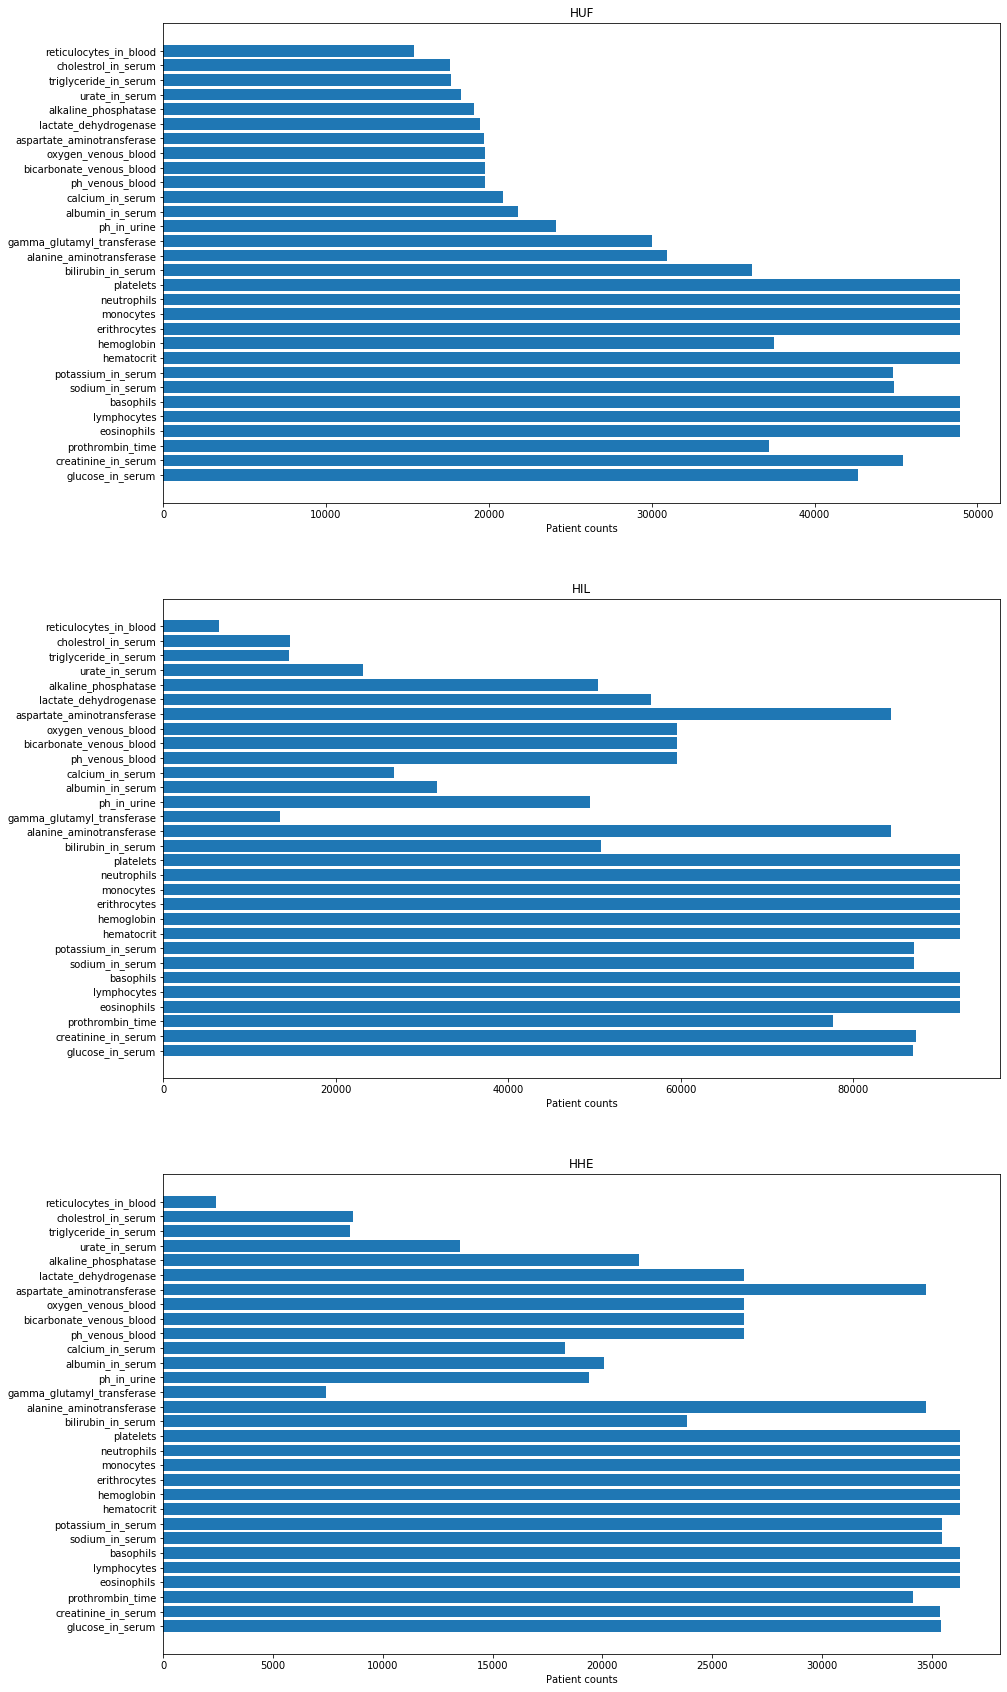

In [33]:
f, axs = plt.subplots(3,1,figsize=(15, 30))

for i in range(len(SITE_NAMES)):
    axs[i].barh(list(per_site_lab_counts[i].keys()), list(per_site_lab_counts[i].values()))
    axs[i].set_title(SITE_NAMES[i])
    axs[i].set_xlabel('Patient counts')
    f.savefig('labs_per_site_hist.png')
plt.show()

## Check if a certain lab is named as somethong else in the other site

In [42]:
SITE_NAME = 'HUF'

lab_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LABS.txt')
lookup_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'LOINC_LOOKUP.txt')

# get the lab information
df_labs = pd.read_csv(lab_csv_path, delimiter='|', quotechar=None, quoting=3)

# get the loinc lookup file to get description of the lab test
df_loinc = pd.read_csv(lookup_csv_path, delimiter='|')

# remove duplicate loincs
df_loinc.drop_duplicates(subset=['LOINC'], keep='last', inplace=True)

# merge with labs csv to get lab descriptions based on LOINC
df_labs = pd.merge(df_labs, df_loinc, on='LOINC', how='inner')

df_labs.rename(columns = {'VALUE_x':'LAB_TEST_VALUE', 'DESCRIPTION':'LAB_TEST_NAME'}, inplace=True)

keep_inds = df_labs.LAB_TEST_NAME.str.contains('Urea', regex=False)

df_labs[keep_inds].LAB_TEST_NAME.unique()

## Get the common 2nd level medications across all sites

In [2]:
SITE_NAMES = ['HUF', 'HIL', 'HHE']

per_site_second_level_medications_list = []
for SITE_NAME in SITE_NAMES:
    print('Getting medication codes for site : %s'%SITE_NAME)
    medication_csv_path = os.path.join('/rgi/data/'+SITE_NAME+'/deidentified_data', 'MEDICATION_ADMINISTRATION.txt')

    # get the medication administration information
    df_medications = pd.read_csv(medication_csv_path, delimiter='|') 

    # drop unwanted columns to save memory
    df_medications.drop(columns=['ORDER_ID', 'ORDER_MED_ID', 'PHAPRO_CD', 'VALUE', 'UNIT'], inplace=True)

    # get first level of medication codes
    df_medications.ATC_CD = df_medications.ATC_CD.astype(str)
    atc_first_levels = [i[0] for i in df_medications.ATC_CD] 
    df_medications['atc_first_levels'] = atc_first_levels
    del atc_first_levels

    # get the second level of medication codes
    atc_second_levels = [i[:3] for i in df_medications.ATC_CD]
    df_medications['atc_second_levels'] = atc_second_levels
    del atc_second_levels

    all_second_levels = list(df_medications['atc_second_levels'].unique())
    legal_second_levels = [i for i in all_second_levels if (i[0].isalpha() and len(i)==3 and i!='nan')]
    
    del df_medications
    
    per_site_second_level_medications_list.append(legal_second_levels)

Getting medication codes for site : HUF


KeyboardInterrupt: 

In [10]:
len(per_site_second_level_medications_list[2])

77

In [16]:
medication_list = list(set(per_site_second_level_medications_list[0]) & set(per_site_second_level_medications_list[1]) 
     & set(per_site_second_level_medications_list[2]))
medication_list.sort()

medication_list = ['%s_second_level_medication'%i for i in medication_list]

In [18]:
# create a csv of the medication columns present across all sites to insert into the spec sheet
medication_cols_df = pd.DataFrame(columns=['Column_name'], data=medication_list)

In [20]:
medication_cols_df.to_csv('medication_cols.csv', index=False)

In [15]:
medication_list

['A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A09',
 'A10',
 'A11',
 'A12',
 'B01',
 'B02',
 'B03',
 'B05',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C07',
 'C08',
 'C09',
 'C10',
 'D06',
 'D07',
 'D08',
 'G01',
 'G02',
 'G04',
 'H01',
 'H02',
 'H03',
 'H04',
 'H05',
 'J01',
 'J02',
 'J04',
 'J05',
 'J06',
 'J07',
 'L01',
 'L02',
 'L03',
 'L04',
 'M01',
 'M03',
 'M04',
 'M05',
 'N01',
 'N02',
 'N03',
 'N04',
 'N05',
 'N06',
 'N07',
 'P01',
 'P02',
 'P03',
 'R01',
 'R03',
 'R05',
 'R06',
 'S01',
 'V03',
 'V04',
 'V06',
 'V07']

## Explore relation between medication administration and mediction order

In [227]:
med_ord_df = pd.read_csv('/rgi/data/HUF/deidentified_data/MEDICATION_ORDER.txt', delimiter='|')
med_adm_df = pd.read_csv('/rgi/data/HUF/deidentified_data/MEDICATION_ADMINISTRATION.txt', delimiter='|')
demographics_df = pd.read_csv('/home/prash/datasets/v20210909/HUF/demographics_before_icu.csv.gz')

/home/prash/.conda/envs/madrid_data_prep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


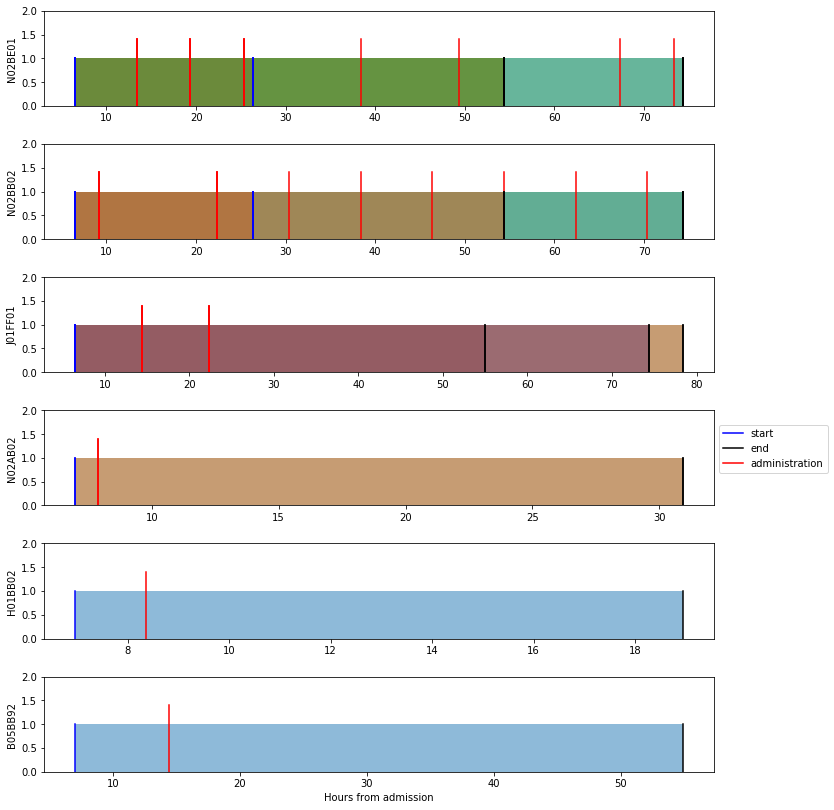

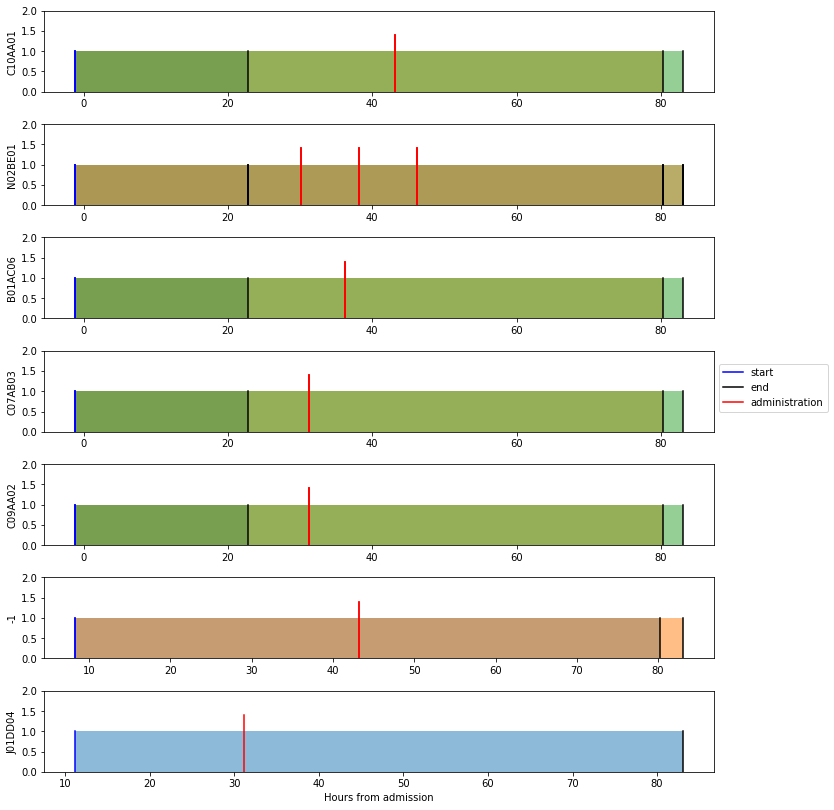

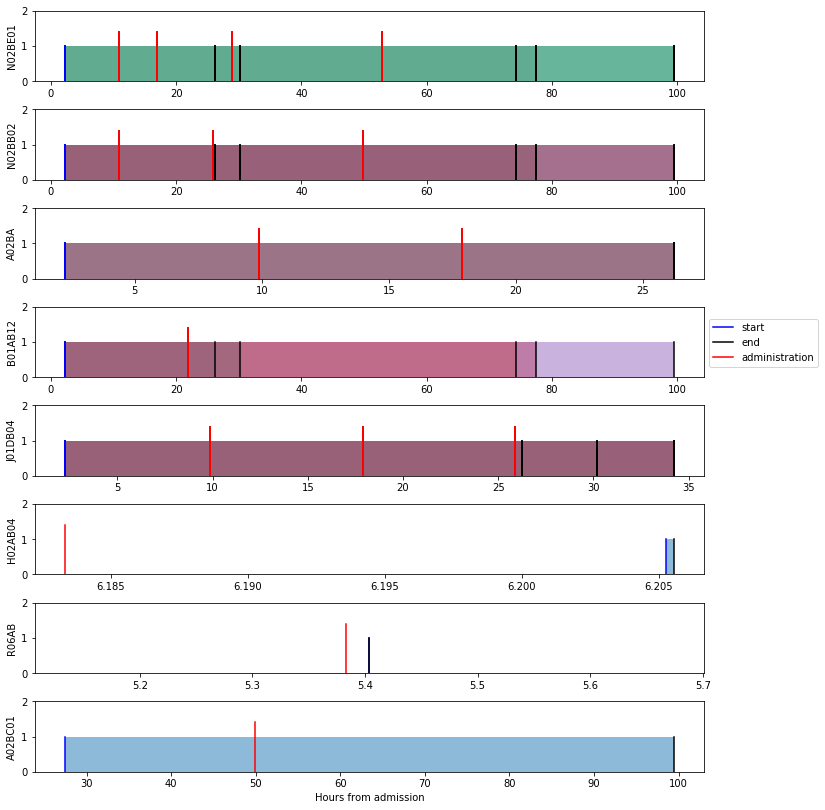

In [160]:
pid_list = [1749330, 1136840, 1832206]
for pid in pid_list:
    cur_pid = pid
    cur_ord_df = med_ord_df[med_ord_df.PATIENT_ID==cur_pid].copy().reset_index(drop=True)
    cur_adm_df = med_adm_df[med_adm_df.PATIENT_ID==cur_pid].copy().reset_index(drop=True)
    cur_dem_df = demographics_df[demographics_df.patient_id==cur_pid].copy().reset_index(drop=True)
    cur_dem_df.rename(columns={'patient_id':'PATIENT_ID'}, inplace=True)

    key_cols = ['FACILITY_CD', 'PATIENT_ID', 'ORDER_MED_ID', 'ORDER_ID', 'ATC_CD']
    keep_cols = ['ORDER_START_TS', 'START_DATE', 'END_DATE', 'TS']

    cur_med_ord_adm_df = pd.merge(cur_ord_df, cur_adm_df, how='inner', on=key_cols)[key_cols+keep_cols]
    cur_med_ord_adm_df = pd.merge(cur_med_ord_adm_df, cur_dem_df, how='inner', on=['PATIENT_ID'])[key_cols+keep_cols+['admission_timestamp']]
    
    if len(cur_med_ord_adm_df)>0:

        # CONVERT THE MEDICATION TS TO HORS FROM ADMISSION
        med_order_start_date_tdiffs = pd.to_datetime(cur_med_ord_adm_df['START_DATE'])-pd.to_datetime(cur_med_ord_adm_df['admission_timestamp'])
        med_order_start_date_tdiffs = [i.total_seconds()/3600. for i in med_order_start_date_tdiffs]

        med_order_end_date_tdiffs = pd.to_datetime(cur_med_ord_adm_df['END_DATE'])-pd.to_datetime(cur_med_ord_adm_df['admission_timestamp'])
        med_order_end_date_tdiffs = [i.total_seconds()/3600. for i in med_order_end_date_tdiffs]

        med_adm_date_tdiffs = pd.to_datetime(cur_med_ord_adm_df['TS'])-pd.to_datetime(cur_med_ord_adm_df['admission_timestamp'])
        med_adm_date_tdiffs = [i.total_seconds()/3600. for i in med_adm_date_tdiffs]

        cur_med_ord_adm_df['med_order_start_hrs_from_admission'] = med_order_start_date_tdiffs
        cur_med_ord_adm_df['med_order_end_hrs_from_admission'] = med_order_end_date_tdiffs
        cur_med_ord_adm_df['med_adm_hrs_from_admission'] = med_adm_date_tdiffs


        ## plot the start and end date of the orders and their administration times
        med_atc_cds = cur_med_ord_adm_df.ATC_CD.unique()

        f, axs = plt.subplots(len(med_atc_cds), 1, figsize=(12, 14))

        for kk, med_atc_cd in enumerate(med_atc_cds):
            cur_df = cur_med_ord_adm_df[cur_med_ord_adm_df.ATC_CD==med_atc_cd].copy()
            cur_ord_med_start_dates = cur_df.med_order_start_hrs_from_admission.values
            cur_ord_med_end_dates = cur_df.med_order_end_hrs_from_admission.values
            cur_adm_med_dates = cur_df.med_adm_hrs_from_admission.values

            for ii in range(len(cur_ord_med_start_dates)):
                axs[kk].axvline(cur_ord_med_start_dates[ii], ymax=.5, color='b', label='start')
                axs[kk].axvline(cur_ord_med_end_dates[ii], ymax=.5, color='k', label='end')
                axs[kk].fill_between([cur_ord_med_start_dates[ii], cur_ord_med_end_dates[ii]], [1., 1.], alpha=0.5)
                axs[kk].set_ylim([0., 2.])
                axs[kk].axvline(cur_adm_med_dates[ii], ymax=.7, color='r', label='administration')


            axs[kk].set_ylabel('%s'%med_atc_cd)
        axs[len(axs)-1].set_xlabel('Hours from admission')
        handles, labels = axs[3].get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        axs[3].legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.0, 0.9))
        plt.subplots_adjust(hspace=0.4)
        f.savefig('%s_orders_vs_administration.png'%str(pid), bbox_inches='tight', pad_inches=0.2)
#         plt.show()

In [228]:
# med_ord_df[(med_ord_df.PATIENT_ID==1749330)&(med_ord_df.ATC_CD=='J01FF01')]
med_ord_df[(med_ord_df.PATIENT_ID==1136840)&(med_ord_df.ATC_CD=='B01AC06')]

,FACILITY_CD,PATIENT_ID,ORDER_ID,ORDER_START_TS,ORDER_MED_ID,ROUTE,PHARMACY_CD,ATC_CD,VALUE,UNIT,START_DATE,END_DATE
8925,1,1136840,1247290,2019-02-11 00:33:38,15381477,ORAL,624833,B01AC06,100.0,mg,2019-02-11 00:33:38,2019-02-12 00:33:38
8932,1,1136840,14681160,2019-02-11 10:02:11,11446337,ORAL,624833,B01AC06,100.0,mg,2019-02-11 00:33:38,2019-02-14 10:02:11
8940,1,1136840,13299532,2019-02-11 12:55:40,12929091,ORAL,624833,B01AC06,100.0,mg,2019-02-11 00:33:38,2019-02-14 12:55:40


In [229]:
# med_adm_df[(med_adm_df.PATIENT_ID==1749330)&(med_adm_df.ATC_CD=='J01FF01')]
med_adm_df[(med_adm_df.PATIENT_ID==1136840)&(med_adm_df.ATC_CD=='B01AC06')]

,FACILITY_CD,PATIENT_ID,ORDER_ID,ORDER_MED_ID,PHAPRO_CD,ATC_CD,VALUE,UNIT,TS
49430,1,1136840,1247290,15381477,624833,B01AC06,100.0,mg,2019-02-12 14:00:00
49438,1,1136840,14681160,11446337,624833,B01AC06,100.0,mg,2019-02-12 14:00:00
49447,1,1136840,13299532,12929091,624833,B01AC06,100.0,mg,2019-02-12 14:00:00


In [142]:
med_adm_df.PATIENT_ID.unique()[70:90]

array([1203463, 1736429, 1464603, 1633390,  126796, 1899779, 1614637,
         19921, 1130204, 1867517, 1721993, 1818353, 1710261, 1920288,
       1832206, 1223391, 1216614,  161114, 1645459, 1708048])

In [163]:
med_ord_adm_df = pd.merge(med_ord_df, med_adm_df, how='inner', on=key_cols)[key_cols+keep_cols]

,FACILITY_CD,PATIENT_ID,ORDER_MED_ID,ORDER_ID,ATC_CD,ORDER_START_TS,START_DATE,END_DATE,TS
0,1,1226852,17486156,17148009,B05BB91,2023-05-30 04:55:48,2023-05-30 04:55:48,2023-05-30 04:55:48,2023-05-30 04:55:00
1,1,1226852,18122552,18256476,N02BE01,2023-05-30 04:26:09,2023-05-30 04:26:09,2023-05-30 04:26:10,2023-05-30 04:54:00
2,1,1226852,15291257,18256476,A03FA01,2023-05-30 04:26:09,2023-05-30 04:26:09,2023-05-30 04:26:10,2023-05-30 04:54:00
3,1,1970733,18833884,17797169,A02BC01,2023-06-11 19:00:06,2023-06-11 19:00:06,2023-06-12 19:00:06,2023-06-13 08:00:00
4,1,1970733,18833884,17797169,A02BC01,2023-06-11 19:00:06,2023-06-11 19:00:06,2023-06-12 19:00:06,2023-06-14 08:00:00
...,...,...,...,...,...,...,...,...,...
49110898,1,1695802,16891663,15701879,N02BE01,2020-10-04 11:37:41,2020-10-02 09:14:48,2020-10-05 11:37:41,2020-10-03 16:00:00
49110899,1,1695802,16891663,15701879,N02BE01,2020-10-04 11:37:41,2020-10-02 09:14:48,2020-10-05 11:37:41,2020-10-04 01:00:00
49110900,1,1695802,16891663,15701879,N02BE01,2020-10-04 11:37:41,2020-10-02 09:14:48,2020-10-05 11:37:41,2020-10-04 09:00:00
49110901,1,1935026,11311828,15690260,J01CR02,2021-06-25 11:37:08,2021-06-25 11:37:08,2021-06-26 11:37:08,2021-06-26 01:00:00


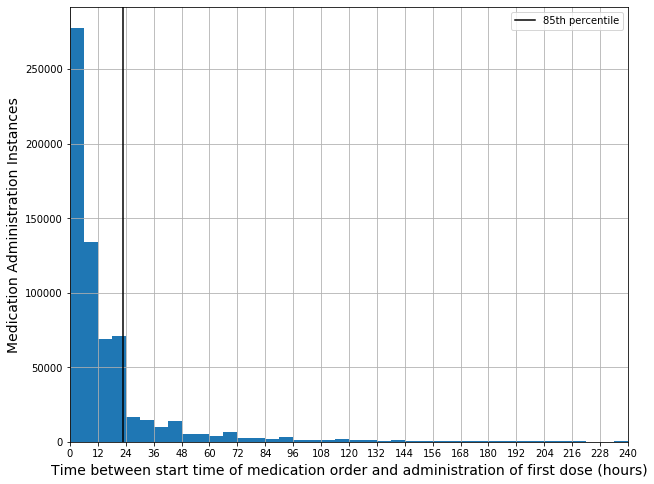

In [232]:
# seg_med_ord_adm_df = med_ord_adm_df[:1000000].copy()
seg_med_ord_adm_df = med_ord_adm_df.drop_duplicates(subset=['PATIENT_ID', 'ATC_CD', 'START_DATE'])

start_administration_diff = pd.to_datetime(seg_med_ord_adm_df.TS) - pd.to_datetime(seg_med_ord_adm_df.START_DATE)
start_administration_diff = [i.total_seconds()/3600. for i in start_administration_diff]
fontsize=14
f, axs = plt.subplots(figsize=(10, 8))
bins=np.arange(0, 600, 6)
axs.hist(start_administration_diff, bins=bins, density=False)
# axs.axvline(np.nanmedian(start_administration_diff), color='r', label='median')
axs.axvline(np.nanpercentile(start_administration_diff, 85), color='k', label='85th percentile')
# axs.axvline(np.nanpercentile(start_administration_diff, 75), color='k')
# axs.set_xscale("log", basex=2)
axs.set_xticks(bins[::2])
axs.set_xlim([0, 240])
axs.set_ylabel('Medication Administration Instances', fontsize=fontsize)
axs.set_xlabel('Time between start time of medication order and administration of first dose (hours)', fontsize=fontsize)
# axs.hist(start_administration_diff)
axs.grid(True)
axs.legend()
f.savefig('med_order_administration_tdiff_hist.png', pad_inches=0.2)
plt.show()

In [230]:
seg_med_ord_adm_df

,FACILITY_CD,PATIENT_ID,ORDER_MED_ID,ORDER_ID,ATC_CD,ORDER_START_TS,START_DATE,END_DATE,TS
0,1,1226852,17486156,17148009,B05BB91,2023-05-30 04:55:48,2023-05-30 04:55:48,2023-05-30 04:55:48,2023-05-30 04:55:00
1,1,1226852,18122552,18256476,N02BE01,2023-05-30 04:26:09,2023-05-30 04:26:09,2023-05-30 04:26:10,2023-05-30 04:54:00
2,1,1226852,15291257,18256476,A03FA01,2023-05-30 04:26:09,2023-05-30 04:26:09,2023-05-30 04:26:10,2023-05-30 04:54:00
3,1,1970733,18833884,17797169,A02BC01,2023-06-11 19:00:06,2023-06-11 19:00:06,2023-06-12 19:00:06,2023-06-13 08:00:00
6,1,1970733,19298391,17797169,M01AE01,2023-06-11 19:00:06,2023-06-11 19:00:06,2023-06-12 19:00:06,2023-06-12 17:00:00
...,...,...,...,...,...,...,...,...,...
49110871,1,1695802,13718799,14322032,N01BB,2020-10-02 09:14:48,2020-10-02 09:14:48,2020-10-03 09:14:48,2020-10-02 20:53:00
49110872,1,1695802,1441636,14322032,A02BA,2020-10-02 09:14:48,2020-10-02 09:14:48,2020-10-03 09:12:45,2020-10-02 17:00:00
49110874,1,1695802,11842512,14322032,M01AE17,2020-10-02 09:14:48,2020-10-02 09:14:48,2020-10-03 09:14:48,2020-10-02 20:00:00
49110877,1,1695802,12759482,14322032,J01DB04,2020-10-02 09:14:48,2020-10-02 09:14:48,2020-10-03 09:14:48,2020-10-02 17:00:00
